In [25]:
# there are two different ways to train a liner model 1 using a closed form equation and 2 using gradient descent
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression

In [26]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

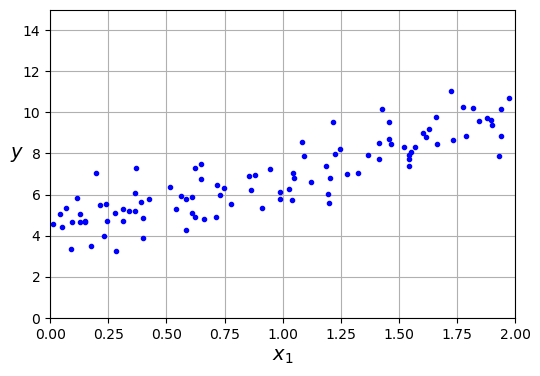

In [27]:
np.random.seed(42)
m = 100  # this is the number of instances
X = 2 * np.random.rand(m, 1)  # this is the column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # this is the column vector
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [28]:
# this is where we compute the theta hat using the normal equation (closed form equation)
X_b = add_dummy_feature(X)  # this add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best
# we would hope that theta_0 = 4 and theta_1 = 3 because that is what we used to generate the data but the smaller and noiser the data the less accurate the result will be

array([[4.21509616],
       [2.77011339]])

In [29]:
# now we can make predictions using theta hat
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # this add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

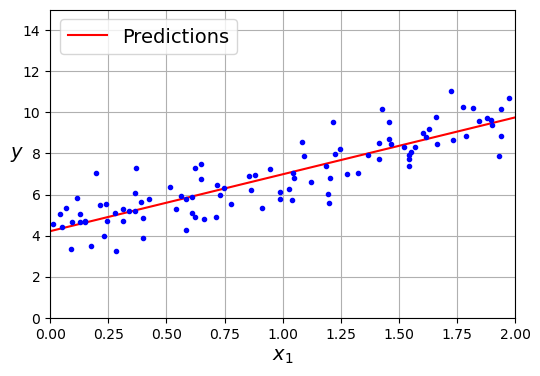

In [30]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("intercept:", lin_reg.intercept_, " coefficent:", lin_reg.coef_)
lin_reg.predict(X_new)

intercept: [4.21509616]  coefficent: [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

In [32]:
# this is the what linear regression is doing under the hood
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
# this function computes theta hat equals to X+ @ y where X+ is the pseudoinverse of X

array([[4.21509616],
       [2.77011339]])

In [33]:
# this computes the pseudoinverse directly
np.linalg.pinv(X_b) @ y
# the pseudoinverse is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U @ Sigma @ V^T this may not work if the matrix is not invertible

array([[4.21509616],
       [2.77011339]])